# 01 - Data Preprocessing & Cleaning


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib

In [51]:
data = pd.read_csv('../data/heart_disease.csv')

X = data.drop(columns=['target'])
y = data['target']

In [52]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']
for col in numerical_cols:
    X[col] = X[col].replace('?', np.nan)
    X[col] = pd.to_numeric(X[col], errors='coerce')

In [53]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']
print("Missing values before preprocessing:\n", X.isnull().sum())

Missing values before preprocessing:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64


In [54]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

In [55]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [56]:
X_preprocessed = preprocessor.fit_transform(X)
feature_names = (numerical_cols + 
                 preprocessor.named_transformers_['cat']
                 .named_steps['onehot']
                 .get_feature_names_out(categorical_cols).tolist())
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names)

In [57]:
X_preprocessed_df.to_csv('../data/heart_disease_preprocessed.csv', index=False)

joblib.dump(preprocessor, '../models/preprocessor.pkl')

['../models/preprocessor.pkl']

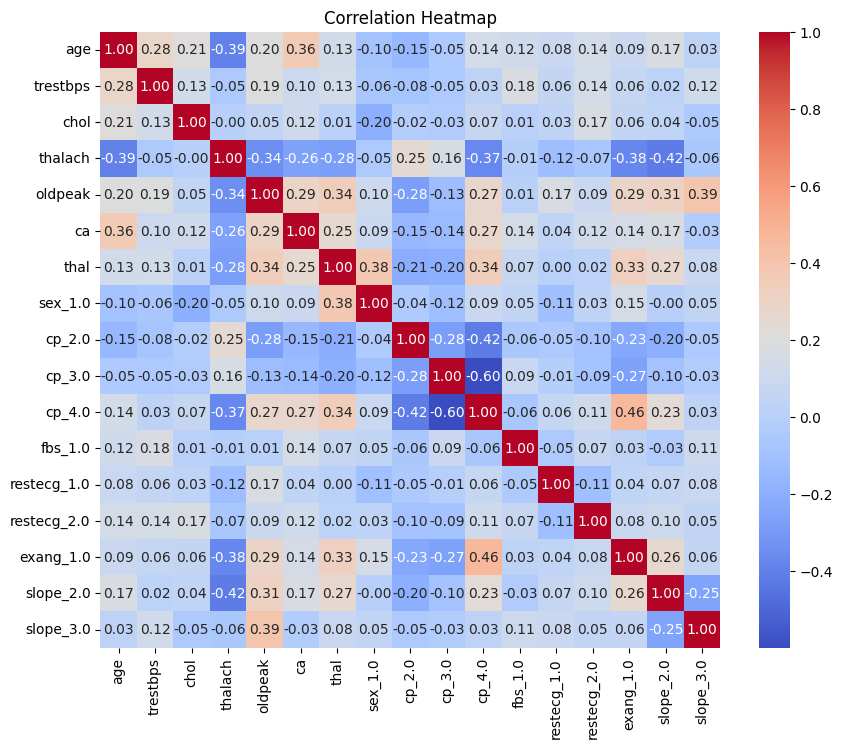

In [58]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_preprocessed_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

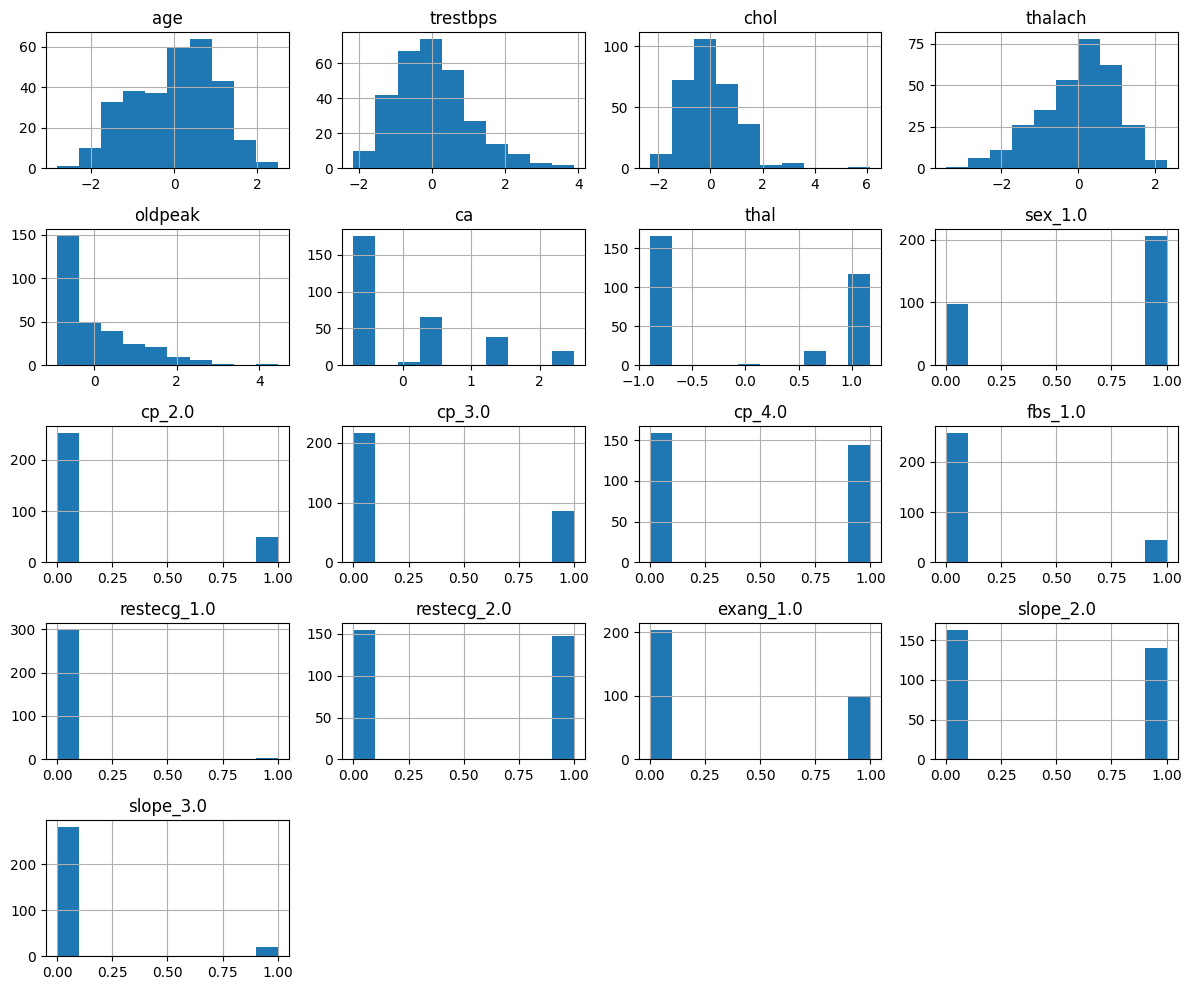

In [59]:
X_preprocessed_df.hist(figsize=(12, 10))
plt.tight_layout()
plt.title('Histograms of Features')
plt.show()

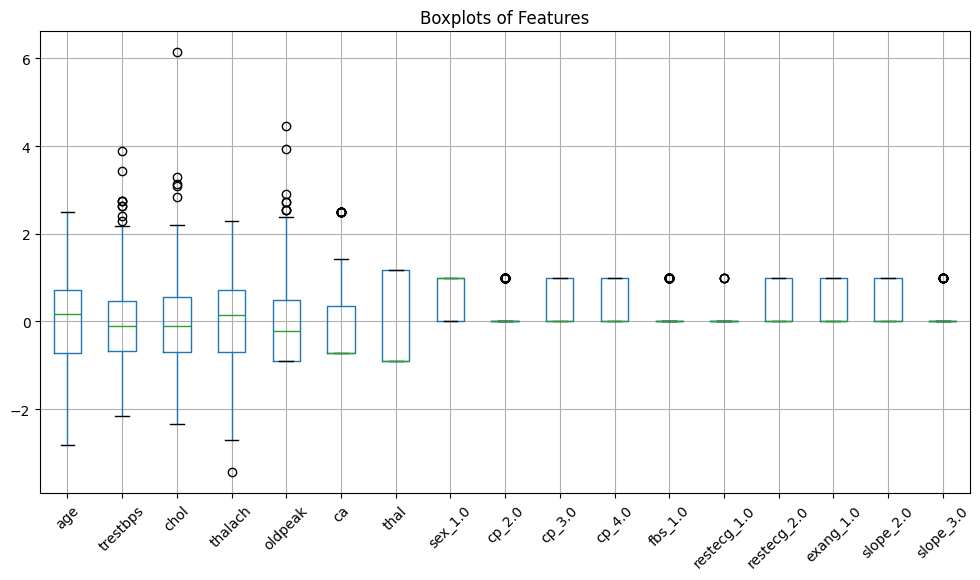

In [60]:
plt.figure(figsize=(12, 6))
X_preprocessed_df.boxplot()
plt.xticks(rotation=45)
plt.title('Boxplots of Features')
plt.show()